In [1]:
import os
import shutil

## Organising Image Files

In [2]:
original_dir_cats = './PetImages/Cat'
original_dir_dogs = './PetImages/Dog'
new_dir = './Pets'

os.mkdir(new_dir)
train_dir = os.path.join(new_dir, 'train')
validation_dir = os.path.join(new_dir, 'validation')
test_dir = os.path.join(new_dir, 'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [3]:
# training
filenames = [f'{i}.jpg' for i in range(8000)]
for filename in filenames:
    src = os.path.join(original_dir_cats, filename)
    dst = os.path.join(train_cats_dir, filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(8000)]
for filename in filenames:
    src = os.path.join(original_dir_dogs, filename)
    dst = os.path.join(train_dogs_dir, filename)
    shutil.copyfile(src, dst)

# validation
filenames = [f'{i}.jpg' for i in range(8000, 10000)]
for filename in filenames:
    src = os.path.join(original_dir_cats, filename)
    dst = os.path.join(validation_cats_dir, filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(8000, 10000)]
for filename in filenames:
    src = os.path.join(original_dir_dogs, filename)
    dst = os.path.join(validation_dogs_dir, filename)
    shutil.copyfile(src, dst)

# test
filenames = [f'{i}.jpg' for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(original_dir_cats, filename)
    dst = os.path.join(test_cats_dir, filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(original_dir_dogs, filename)
    dst = os.path.join(test_dogs_dir, filename)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 8000
total training dog images: 8000
total validation cat images: 2000
total validation dog images: 2000
total test cat images: 2500
total test dog images: 2500


## Image Preprocessing

### check for presence of corrupted files

In [5]:
from PIL import Image

def check_image(dir):
    for filename in os.listdir(dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            try:
                img = Image.open(os.path.join(dir, filename))
                img.verify()
            except (IOError, SyntaxError) as e:
                print('Bad File:', filename)      

In [6]:
print("=========train data===========")
check_image(train_cats_dir)
check_image(train_dogs_dir)
print("=========validaion data=======")
check_image(validation_cats_dir)
check_image(validation_dogs_dir)
print("=========test data============")
check_image(test_cats_dir)
check_image(test_dogs_dir)

=========train data===========
Bad File: 666.jpg
=========validaion data=======


c:\Users\bduma\anaconda3\envs\tensorflowenv\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


=========test data============
Bad File: 11702.jpg


- There were two bad files `666.jpg` in the train/cats directory and `11702.jpg` in the test/dogs directory that affected the training process 

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_gen = train_gen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='binary')

validation_gen = valid_gen.flow_from_directory(validation_dir, 
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode='binary')

test_gen = test_gen.flow_from_directory(test_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')

Found 15999 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


## Building the Model Architecture

In [8]:
from keras import models
from keras import layers 
from keras import optimizers

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

## Train the Model

In [13]:
history = model.fit(train_gen,
                    steps_per_epoch=200,
                    epochs=30,
                    validation_data=validation_gen,
                    validation_steps=50)

Epoch 1/30
200/200 [==============================] - 12s 30ms/step - loss: 0.6843 - accuracy: 0.5458 - val_loss: 0.6386 - val_accuracy: 0.6590
Epoch 2/30
200/200 [==============================] - 7s 33ms/step - loss: 0.6302 - accuracy: 0.6342 - val_loss: 0.5752 - val_accuracy: 0.7000
Epoch 3/30
200/200 [==============================] - 6s 31ms/step - loss: 0.5840 - accuracy: 0.6913 - val_loss: 0.5484 - val_accuracy: 0.7320
Epoch 4/30
200/200 [==============================] - 6s 31ms/step - loss: 0.5626 - accuracy: 0.7065 - val_loss: 0.5244 - val_accuracy: 0.7410
Epoch 5/30
200/200 [==============================] - 6s 31ms/step - loss: 0.5444 - accuracy: 0.7243 - val_loss: 0.5096 - val_accuracy: 0.7570
Epoch 6/30
200/200 [==============================] - 6s 31ms/step - loss: 0.5144 - accuracy: 0.7467 - val_loss: 0.5088 - val_accuracy: 0.7450
Epoch 7/30
200/200 [==============================] - 6s 31ms/step - loss: 0.4989 - accuracy: 0.7582 - val_loss: 0.4651 - val_accuracy: 0.783

c:\Users\bduma\anaconda3\envs\tensorflowenv\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


200/200 [==============================] - 6s 32ms/step - loss: 0.4973 - accuracy: 0.7545 - val_loss: 0.4825 - val_accuracy: 0.7610
Epoch 9/30
200/200 [==============================] - 6s 32ms/step - loss: 0.4811 - accuracy: 0.7732 - val_loss: 0.4579 - val_accuracy: 0.7880
Epoch 10/30
200/200 [==============================] - 6s 31ms/step - loss: 0.4591 - accuracy: 0.7704 - val_loss: 0.4744 - val_accuracy: 0.7660
Epoch 11/30
200/200 [==============================] - 6s 29ms/step - loss: 0.4455 - accuracy: 0.7957 - val_loss: 0.4060 - val_accuracy: 0.8130
Epoch 12/30
200/200 [==============================] - 6s 29ms/step - loss: 0.4396 - accuracy: 0.7952 - val_loss: 0.4649 - val_accuracy: 0.7890
Epoch 13/30
200/200 [==============================] - 6s 29ms/step - loss: 0.4278 - accuracy: 0.8072 - val_loss: 0.4910 - val_accuracy: 0.7480
Epoch 14/30
200/200 [==============================] - 6s 30ms/step - loss: 0.4108 - accuracy: 0.8133 - val_loss: 0.4726 - val_accuracy: 0.7910
Epoch

## Plot Training and Validation Accuracy

In [14]:
import matplotlib.pyplot as plt

def validation_plot(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.legend()

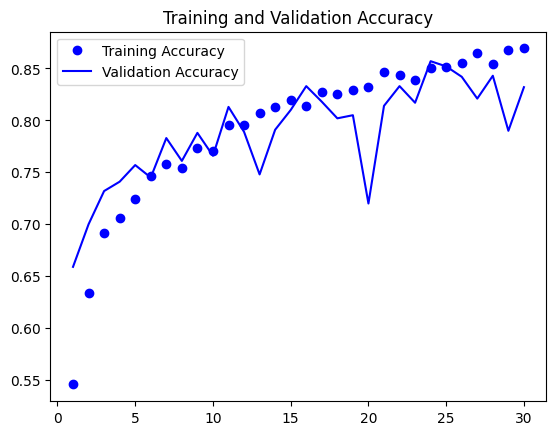

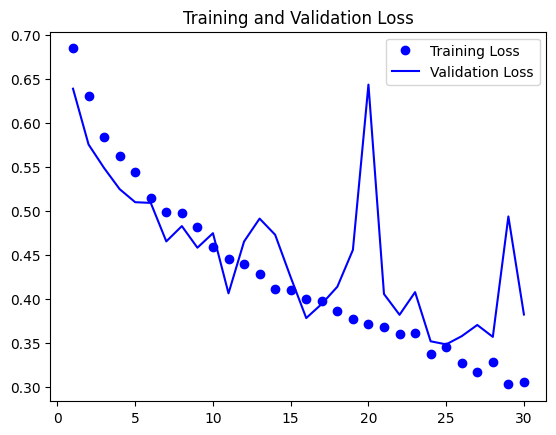

In [15]:
validation_plot(history)

## Refit the model
- plots show overfitting after 20 epochs with an accuracy of around 82%

In [16]:
history = model.fit(train_gen,
                    steps_per_epoch=200,
                    epochs=20,
                    validation_data=validation_gen,
                    validation_steps=50)

Epoch 1/20
200/200 [==============================] - 6s 30ms/step - loss: 0.3002 - accuracy: 0.8702 - val_loss: 0.3409 - val_accuracy: 0.8420
Epoch 2/20
200/200 [==============================] - 6s 29ms/step - loss: 0.2937 - accuracy: 0.8783 - val_loss: 0.3105 - val_accuracy: 0.8680
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.8737

c:\Users\bduma\anaconda3\envs\tensorflowenv\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


200/200 [==============================] - 6s 30ms/step - loss: 0.2904 - accuracy: 0.8737 - val_loss: 0.3870 - val_accuracy: 0.8180
Epoch 4/20
200/200 [==============================] - 6s 30ms/step - loss: 0.2846 - accuracy: 0.8795 - val_loss: 0.4001 - val_accuracy: 0.8380
Epoch 5/20
200/200 [==============================] - 6s 29ms/step - loss: 0.2751 - accuracy: 0.8820 - val_loss: 0.3995 - val_accuracy: 0.8270
Epoch 6/20
200/200 [==============================] - 6s 29ms/step - loss: 0.2607 - accuracy: 0.8947 - val_loss: 0.4413 - val_accuracy: 0.8230
Epoch 7/20
200/200 [==============================] - 6s 29ms/step - loss: 0.2742 - accuracy: 0.8870 - val_loss: 0.3176 - val_accuracy: 0.8730
Epoch 8/20
200/200 [==============================] - 6s 29ms/step - loss: 0.2623 - accuracy: 0.8907 - val_loss: 0.3712 - val_accuracy: 0.8390
Epoch 9/20
200/200 [==============================] - 6s 30ms/step - loss: 0.2444 - accuracy: 0.9020 - val_loss: 0.3491 - val_accuracy: 0.8530
Epoch 10/2

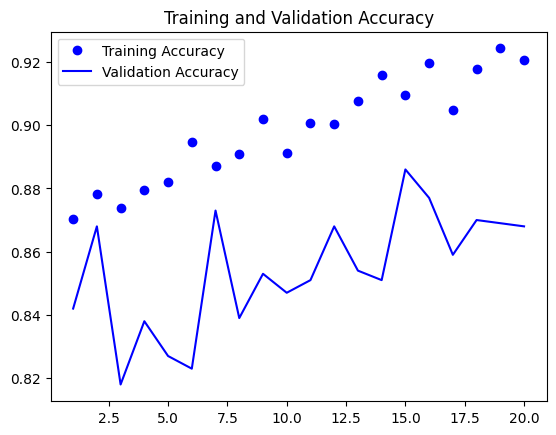

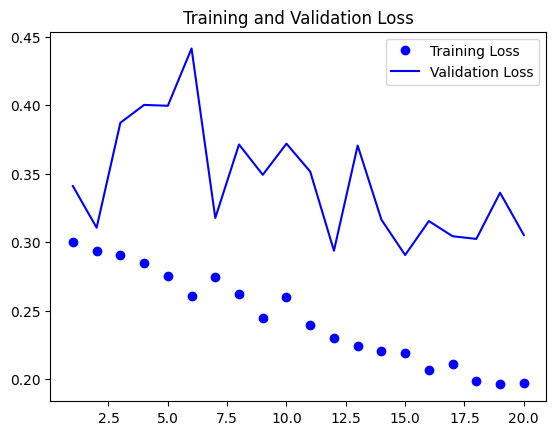

In [17]:
validation_plot(history)

## Adding VGG16 convbase

In [18]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.trainable = False

In [19]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [22]:
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_gen = train_gen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='binary')

validation_gen = valid_gen.flow_from_directory(validation_dir, 
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode='binary')

test_gen = test_gen.flow_from_directory(test_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')

Found 15999 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [23]:
history = model.fit(train_gen,
          steps_per_epoch=100,
          epochs=25,
          validation_data=validation_gen,
          validation_steps=50)

Epoch 1/25
100/100 [==============================] - 10s 69ms/step - loss: 0.4314 - accuracy: 0.7860 - val_loss: 0.2941 - val_accuracy: 0.8860
Epoch 2/25
100/100 [==============================] - 7s 67ms/step - loss: 0.3133 - accuracy: 0.8605 - val_loss: 0.2823 - val_accuracy: 0.8710
Epoch 3/25
100/100 [==============================] - 7s 67ms/step - loss: 0.2833 - accuracy: 0.8800 - val_loss: 0.2609 - val_accuracy: 0.8910
Epoch 4/25
100/100 [==============================] - 7s 67ms/step - loss: 0.2265 - accuracy: 0.9065 - val_loss: 0.2281 - val_accuracy: 0.8960
Epoch 5/25
100/100 [==============================] - 7s 67ms/step - loss: 0.2224 - accuracy: 0.9085 - val_loss: 0.2644 - val_accuracy: 0.8810
Epoch 6/25
100/100 [==============================] - 7s 68ms/step - loss: 0.2286 - accuracy: 0.9025 - val_loss: 0.2197 - val_accuracy: 0.9070
Epoch 7/25
100/100 [==============================] - 7s 68ms/step - loss: 0.1913 - accuracy: 0.9230 - val_loss: 0.2284 - val_accuracy: 0.911

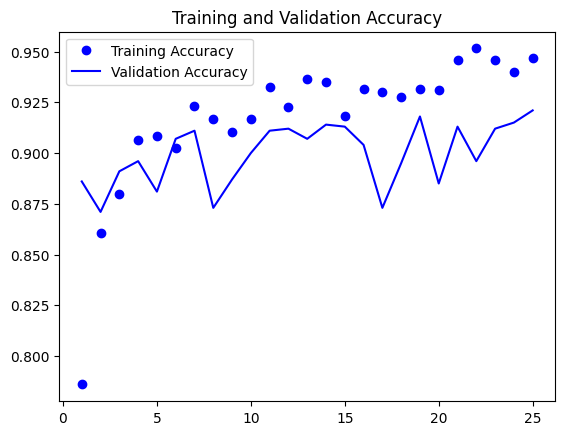

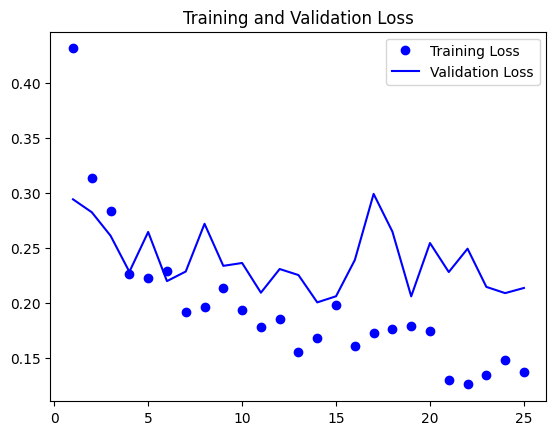

In [24]:
validation_plot(history)

In [25]:
model.save('cats_and_dogs_1.keras')

In [1]:
from keras import models

model = models.load_model('cats_and_dogs_1.keras')

In [2]:
test_dir = "./Pets/test"

from keras.preprocessing.image import ImageDataGenerator

test_gen = ImageDataGenerator(rescale=1./255)

test_gen = test_gen.flow_from_directory(test_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')

Found 4999 images belonging to 2 classes.


In [3]:
scores = model.evaluate(test_gen)

250/250 [==============================] - 27s 73ms/step - loss: 0.2216 - accuracy: 0.9144


- Final test accuracy 91%